##### Se cargan las librerías

In [164]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, svm
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import metrics
from sklearn.cross_validation import train_test_split


#### Se carga un dataset de scikit learn

In [145]:
ds = datasets.load_diabetes()
print datasets.load_diabetes()

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
         0.01990842, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
        -0.06832974, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
         0.00286377, -0.02593034],
       ..., 
       [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
        -0.04687948,  0.01549073],
       [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
         0.04452837, -0.02593034],
       [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
        -0.00421986,  0.00306441]]), 'target': array([ 151.,   75.,  141.,  206.,  135.,   97.,  138.,   63.,  110.,
        310.,  101.,   69.,  179.,  185.,  118.,  171.,  166.,  144.,
         97.,  168.,   68.,   49.,   68.,  245.,  184.,  202.,  137.,
         85.,  131.,  283.,  129.,   59.,  341.,   87.,   65.,  102.,
        265.,  276.,  252.,   90.,  100.,   55.,   61.,   92.,  259.,
         53.,  1

##### Se mezclan los datos y se los divide en datos de entrenamiento y datos de validacion

In [150]:
print len(ds.data)
print ds.data.shape
print len(ds.target)
print ds.target.shape

442
(442, 10)
442
(442,)


In [165]:
#X_train = X[:.9 * n_sample]
#y_train = y[:.9 * n_sample]
#X_test = X[.9 * n_sample:]
#y_test = y[.9 * n_sample:]
def cargar_datos_prueba():
    iris = datasets.load_iris()
    X = iris.data
    y = iris.target
    # Se recorren todos los valores de datos(data) y labels (targets) y se 
    # elimina cualquier valor que sea igual a cero.
    X = X[y != 0, :2]
    y = y[y != 0]
    print "X: ",len(X)
    print "y: ",len(y)
    # Se genera una division aleatoria entre datos de prueba y entrenamiento
    X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                        test_size=0.40, random_state=42)
    
    return (X_train,y_train,X_test, y_test)

    #Backup de la version anterior.
    #n_sample = len(X)
    #np.random.seed(0)
    #order = np.random.permutation(n_sample)
    #X = X[order]
    #y = y[order].astype(np.float)
    #return (X[:.9 * n_sample],y[:.9 * n_sample],X[.9 * n_sample:],y[.9 * n_sample:])


In [166]:

X_train,y_train,X_test, y_test = cargar_datos_prueba()

X:  100
y:  100


#### Metodo para graficar los elementos del modelo

In [167]:
def graficar(nombre_kernel):
    #plt.figure(nro_fig)
    plt.clf()
    plt.scatter(X[:, 0], X[:, 1], c=y, zorder=10, cmap=plt.cm.Paired)

    # Circle out the test data
    #plt.scatter(X_test[:, 0], X_test[:, 1], s=80, facecolors='none', zorder=10)

    plt.axis('tight')
    x_min = X[:, 0].min()
    x_max = X[:, 0].max()
    y_min = X[:, 1].min()
    y_max = X[:, 1].max()
    
    XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
    Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(XX.shape)
    plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired)
    plt.contour(XX, YY, Z, colors=['k', 'k', 'k'], linestyles=['--', '-', '--'],
                levels=[-.5, 0, .5])
    plt.title("Kernel "+nombre_kernel)
    plt.show()

    

In [168]:
def plot_matrix(clf, X_test, y_test):
    plt.clf()
    plt.imshow(confusion_matrix(clf.predict(X_test), y_test),
               interpolation='nearest', cmap=plt.cm.Blues)
    plt.colorbar()
    plt.xlabel("true label")
    plt.ylabel("predicted label")
    plt.show()

#### Se entrena el modelo y se retornan las predicciones para un conjunto de datos

In [169]:
def entrenar_kernel(nombre_kernel):
    clf = svm.SVC(kernel=nombre_kernel, gamma=10)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    return (clf,y_pred)


##### Para las diferencias hacer: 
##### 1. classication_report(), con valores como recall, y precision, f1-score.
##### 2. score(precision).
##### 3. Matriz de confusion.
##### de los datos de prueba contra los datos de validacion.

In [170]:
def imprimir_estadisticas(nombre_kernel,mykernel,X_test,y_pred,y_test):
    print ""
    print "Kernel testeado: ",nombre_kernel
    print classification_report(y_pred, y_test)
    print "La matriz de confusion obtenida es la siguiente:"
    print confusion_matrix(y_pred, y_test)
    print ""
    print "Precision media del kernel: ",mykernel.score(X_test, y_test)
    print ""
    print ""
    
    
    

##### Se entrenan y compara el rendimiento de los kernels con los datos de prueba


Kernel testeado:  rbf
             precision    recall  f1-score   support

          1       0.74      0.81      0.77        21
          2       0.76      0.68      0.72        19

avg / total       0.75      0.75      0.75        40

La matriz de confusion obtenida es la siguiente:
[[17  4]
 [ 6 13]]

Precision media del kernel:  0.75




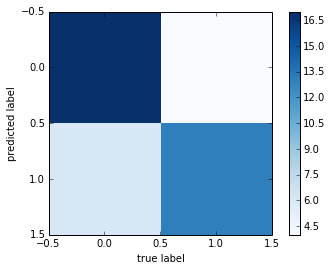

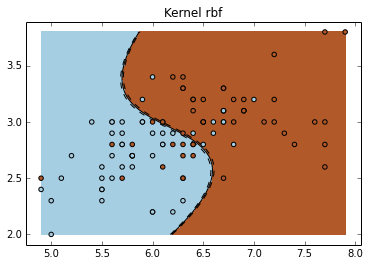

In [171]:
kernel,y_pred = entrenar_kernel('rbf')
imprimir_estadisticas('rbf',kernel,X_test,y_pred,y_test)
plot_matrix(kernel, X_test, y_test)
graficar('rbf')


Kernel testeado:  poly
             precision    recall  f1-score   support

          1       0.78      0.69      0.73        26
          2       0.53      0.64      0.58        14

avg / total       0.69      0.68      0.68        40

La matriz de confusion obtenida es la siguiente:
[[18  8]
 [ 5  9]]

Precision media del kernel:  0.675




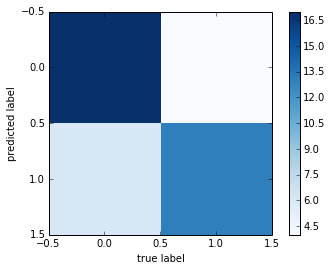

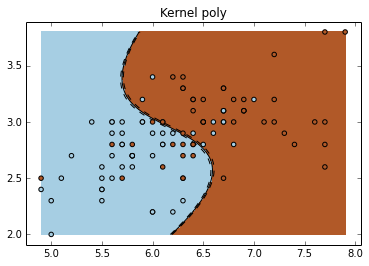

In [172]:
kernel2,y_pred2 = entrenar_kernel('poly')
imprimir_estadisticas('poly',kernel2,X_test,y_pred2,y_test)
plot_matrix(kernel, X_test, y_test)
graficar('poly')
